In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
glass = pd.read_csv("/Users/onatkeskin/Desktop/glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [39]:
glass.Type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

In [40]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

0    163
1     51
Name: household, dtype: int64

In [41]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [42]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[3.11517927]]), array([-6.00934605]))

Text(0, 0.5, 'household')

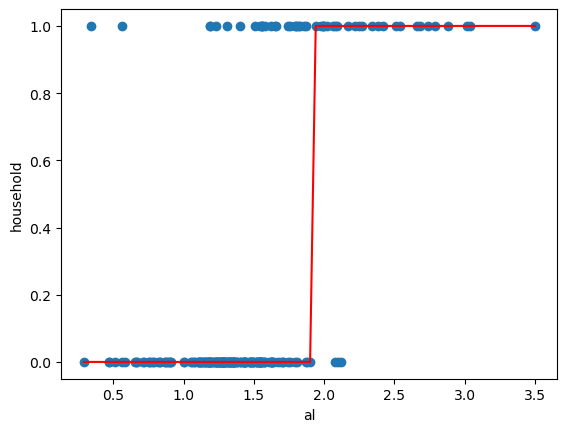

In [43]:
glass.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [44]:
logreg.predict_proba(X)[-15:]

array([[0.26897931, 0.73102069],
       [0.25690627, 0.74309373],
       [0.2175207 , 0.7824793 ],
       [0.1970586 , 0.8029414 ],
       [0.17808328, 0.82191672],
       [0.14066787, 0.85933213],
       [0.12974568, 0.87025432],
       [0.09304321, 0.90695679],
       [0.08791727, 0.91208273],
       [0.07403866, 0.92596134],
       [0.06404364, 0.93595636],
       [0.04915511, 0.95084489],
       [0.03234252, 0.96765748],
       [0.03044844, 0.96955156],
       [0.00743731, 0.99256269]])

In [45]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [46]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0,0.006024
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007032
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0,0.011884
...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1,0.935956
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,0.950845
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1,0.967657
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969552


Text(0, 0.5, 'household')

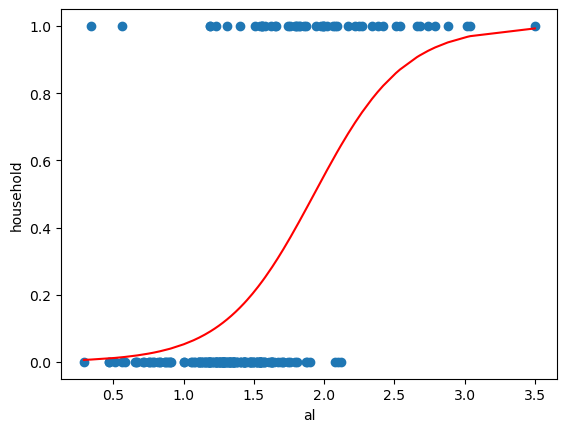

In [47]:
# Plot the predicted probabilities.
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [48]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm

array([[160,   3],
       [ 25,  26]])

In [49]:
Accuracy = (cm[0,0]+ cm[1,1])/ (np.sum(cm))
Accuracy

0.8691588785046729

In [50]:
Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
Precision

0.896551724137931

In [51]:
Recall = (cm[1,1])/ (np.sum(cm[1,:]))
Recall

0.5098039215686274

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y, y_pred=pred)

0.8691588785046729

In [20]:
precision_score(y_true=y, y_pred=pred)

0.896551724137931

In [21]:
recall_score(y,pred)

0.5098039215686274

In [25]:
# Q1
model_LogReg_tresh = logreg.predict_proba(X)[:,1]

In [26]:
X_prediction_NewTresh = [1 if prob > 0.3 else 0 for prob in model_LogReg_tresh]

In [28]:
accuracy_score(y_true=y, y_pred=X_prediction_NewTresh)

0.8644859813084113

In [29]:
precision_score(y_true=y, y_pred=X_prediction_NewTresh)

0.72

In [30]:
recall_score(y,X_prediction_NewTresh)

0.7058823529411765

In [35]:
# Q2

In [56]:
glass.sort_values( by = 'Mg', inplace=True)
X= np.array(glass.Mg).reshape(-1,1)
y = glass.household

In [57]:
logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[-1.33238071]]), array([1.7807468]))

Text(0, 0.5, 'household')

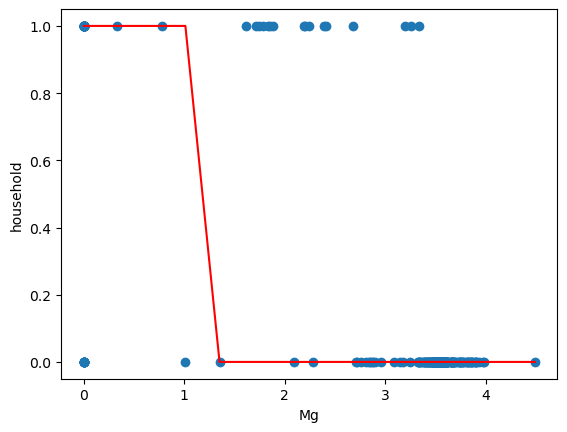

In [58]:
glass.sort_values( by = 'Mg', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Mg, glass.household)
plt.plot(glass.Mg, pred, color='red')
plt.xlabel('Mg')
plt.ylabel('household')

In [59]:
logreg.predict_proba(X)[-15:]

array([[0.96473449, 0.03526551],
       [0.96518499, 0.03481501],
       [0.96562995, 0.03437005],
       [0.96606942, 0.03393058],
       [0.96606942, 0.03393058],
       [0.96650346, 0.03349654],
       [0.96693214, 0.03306786],
       [0.96777366, 0.03222634],
       [0.96818662, 0.03181338],
       [0.96818662, 0.03181338],
       [0.96818662, 0.03181338],
       [0.96939502, 0.03060498],
       [0.97093725, 0.02906275],
       [0.97131087, 0.02868913],
       [0.98524986, 0.01475014]])

In [60]:
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

Text(0, 0.5, 'household')

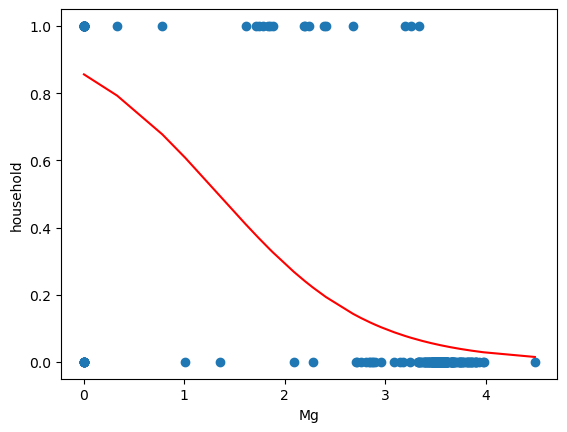

In [61]:
# Plot the predicted probabilities.
plt.scatter(glass.Mg, glass.household)
plt.plot(glass.Mg, glass.household_pred_prob, color='red')
plt.xlabel('Mg')
plt.ylabel('household')

In [62]:
accuracy_score(y_true=y, y_pred=pred)

0.8785046728971962

In [63]:
precision_score(y_true=y, y_pred=pred)

0.7777777777777778

In [64]:
recall_score(y,pred)

0.6862745098039216

In [65]:
model_LogReg_tresh = logreg.predict_proba(X)[:,1]

In [66]:
X_prediction_NewTresh = [1 if prob > 0.3 else 0 for prob in model_LogReg_tresh]

In [67]:
accuracy_score(y_true=y, y_pred=X_prediction_NewTresh)

0.9065420560747663

In [68]:
precision_score(y_true=y, y_pred=X_prediction_NewTresh)

0.7924528301886793

In [69]:
recall_score(y,X_prediction_NewTresh)

0.8235294117647058

In [70]:
# Q3

In [72]:
# Data Seperation
X = glass.drop(columns = 'Type', axis = 1)
Y = glass['Type']
print(X)
print(Y)

          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  household  \
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28          0   
202  1.51514  14.85  0.00  2.42  73.72  0.00   8.39  0.56  0.00          1   
212  1.51651  14.38  0.00  1.94  73.61  0.00   8.48  1.57  0.00          1   
200  1.51508  15.15  0.00  2.25  73.50  0.00   8.34  0.63  0.00          1   
192  1.51623  14.20  0.00  2.79  73.46  0.04   9.04  0.40  0.09          1   
..       ...    ...   ...   ...    ...   ...    ...   ...   ...        ...   
135  1.51789  13.19  3.90  1.30  72.33  0.55   8.44  0.00  0.28          0   
133  1.51800  13.71  3.93  1.54  71.81  0.54   8.21  0.00  0.15          0   
114  1.51847  13.10  3.97  1.19  72.44  0.60   8.43  0.00  0.00          0   
132  1.51813  13.43  3.98  1.18  72.49  0.58   8.15  0.00  0.00          0   
0    1.52101  13.64  4.49  1.10  71.78  0.06   8.75  0.00  0.00          0   

     household_pred_prob  
106             0.855789  
202      

In [74]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
scaler = StandardScaler()

In [75]:
scaler.fit(X)

StandardScaler()

In [76]:
standardized_glass = scaler.transform(X)

In [77]:
print(standardized_glass)

[[ 4.25267336 -3.28694275 -1.86551055 ...  2.29388828 -0.55935984
   1.9209114 ]
 [-1.06457957  1.77017463 -1.86551055 ... -0.5864509   1.78775793
   1.9209114 ]
 [-0.61239854  1.19327046 -1.86551055 ... -0.5864509   1.78775793
   1.9209114 ]
 ...
 [ 0.0345174  -0.3778728   0.893285   ... -0.5864509  -0.55935984
  -0.65097897]
 [-0.07770271  0.02718757  0.9002341  ... -0.5864509  -0.55935984
  -0.65214129]
 [ 0.87286765  0.28495326  1.25463857 ... -0.5864509  -0.55935984
  -0.69550454]]


In [78]:
standard_X = standardized_glass

In [80]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(standard_X, Y, test_size = 0.2, stratify = Y, random_state = 1)
print(standard_X.shape, X_train.shape, X_test.shape)

(214, 11) (171, 11) (43, 11)


In [81]:
model_LogReg= LogisticRegression()

In [82]:
model_LogReg.fit(X_train, Y_train)

LogisticRegression()

In [83]:
# Train data accuracy
X_train_prediction = model_LogReg.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction,Y_train)
train_data_accuracy

0.7602339181286549

In [84]:
# Test data accuracy
X_test_prediction = model_LogReg.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
test_data_accuracy

0.6511627906976745